# Logistic Regression으로 폐암의 양성 음성 분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data
실습에서 사용할 데이터는 폐암의 양성, 음성 여부를 구분하는 문제  

### 1.1 Data Load
데이터는 sklearn.datasets의 load_breast_cancer 함수를 이용해 받을 수 있음  

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [5]:
## 사용되는 변수 확인  
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
## 타겟 정답  
## malignant = 양성 (0)
## benign = 음성 (1)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [9]:
## 데이터와 정답 확인
data, target = cancer['data'], cancer['target']
print("data[0]:", data[0])
print("target[0]:", target[0])

data[0]: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
target[0]: 0


### 1.2 Data EDA

In [10]:
df = pd.DataFrame(data, columns=cancer['feature_names'])
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


양성과 음성의 비율  

In [12]:
pd.Series(target).value_counts()

1    357
0    212
dtype: int64

양성과 음성 값을 히스토그램으로 표현

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

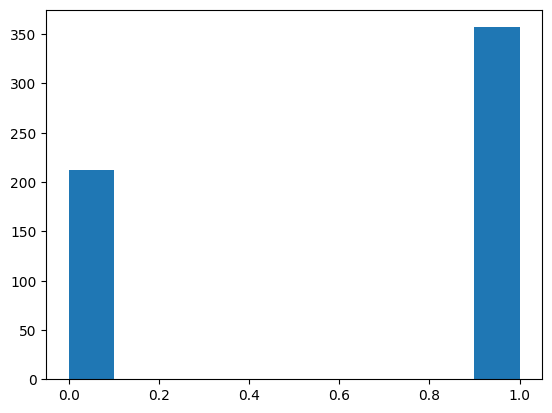

In [13]:
plt.hist(target)

mean radius와 정답간의 상관관계를 plot으로 그리면 아래와 같음  
> mean radius가 클 경우 음성

Text(0, 0.5, 'target')

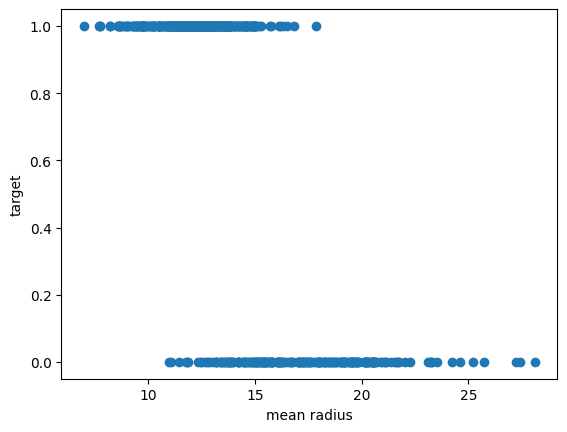

In [16]:
plt.scatter(x=data[:, 0], y=target)
plt.xlabel("mean radius")
plt.ylabel("target")

### 1.3 Data Split

In [17]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [18]:
print("train data 개수:", len(train_data))
print("test data 개수:", len(test_data))

train data 개수: 398
test data 개수: 171


## 2. Linear Regression and Categorical Label
Logistic Regression을 학습하기에 앞서 Linear Regression으로 학습할 경우 어떻게 되는 지 확인해 보기

In [19]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

### 2.1 학습

In [20]:
linear_regressor.fit(train_data, train_target)

LinearRegression()

### 2.2 예측

In [21]:
train_pred = linear_regressor.predict(train_data)
test_pred = linear_regressor.predict(test_data)

In [22]:
## 예측 결과 0~1 사이를 벗어난 예측값이 많음
train_pred[:10]

array([ 0.65079698, -0.33739828,  0.76995559,  1.07473181,  0.98981797,
       -0.14066351,  0.91330917,  0.56950769,  1.12592692,  1.08459606])

### 2.3 시각화
mean_radius의 값의 변화에 따른 예측한 결과를 시각화하면 다음과 같음  
전체적으로 우하향하는 예측을 함을 알 수 있음  

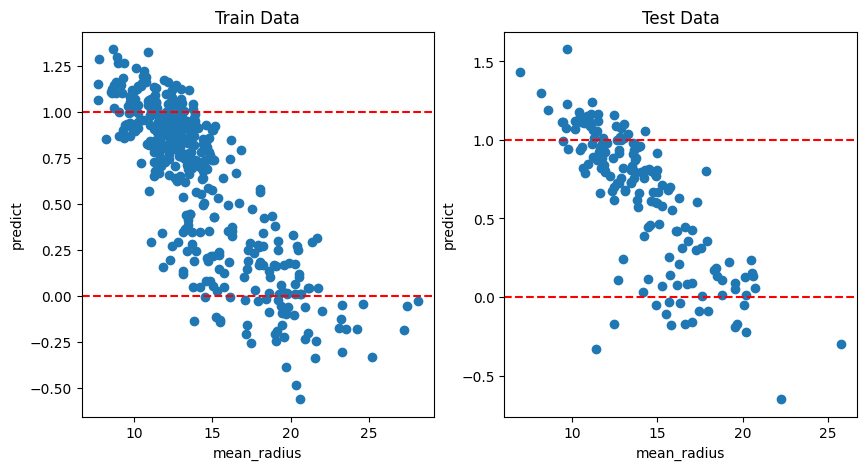

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred)
]

for idx, (name, d, pred) in enumerate(preds):
  ax = axes[idx]
  ax.scatter(x=d[:, 0], y=pred)
  ax.axhline(0, color="red", linestyle="--")
  ax.axhline(1, color="red", linestyle="--")
  ax.set_xlabel("mean_radius")
  ax.set_ylabel("predict")
  ax.set_title(f"{name} Data")

### 2.4 평가하기
Linear Regression의 성능을 측정하기 위해서는 우선 예측값을 0과 1로 변환시켜줘야 함  
앞서 학습했던 Youden's Index를 이용해 Best Threshold를 찾은 후 0과 1로 변화시킨 후 정확도 확인하기  

In [25]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(train_target, train_pred)
auroc = auc(fpr, tpr)

AUROC 그려보기

Text(0, 0.5, 'tpr')

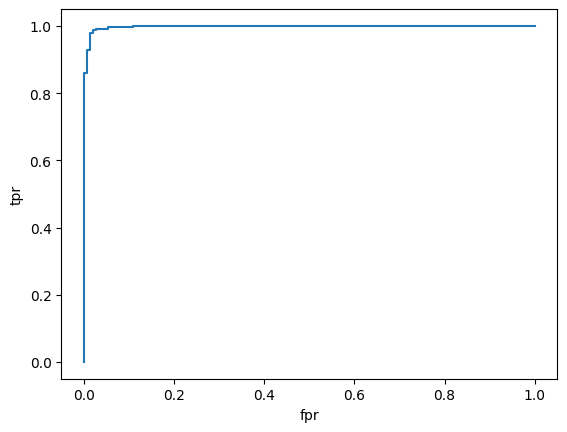

In [26]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

AUROC 값 계산하기

In [27]:
print(f"AUROC: {auroc:.4f}")

AUROC: 0.9979


Best Threshold 계산하기

In [29]:
print(tpr - fpr)
print(f"np.argmax(tpr - fpr):", np.argmax(tpr - fpr))

[0.         0.004      0.86       0.85324324 0.92124324 0.91448649
 0.96648649 0.95972973 0.96772973 0.96097297 0.96497297 0.93794595
 0.94194595 0.88789189 0.89189189 0.        ]
np.argmax(tpr - fpr): 8


In [32]:
J = tpr - fpr
idx = np.argmax(J)
best_thresh = threshold[idx]
print(f"Best Threshold is {best_thresh: .4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]: .4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]: .4f}")
print(f"Best Threshold's J is {J[idx]: .4f}")

Best Threshold is  0.5861
Best Threshold's sensitivity is  0.9880
Best Threshold's specificity is  0.9797
Best Threshold's J is  0.9677


Best Threshold는 AUROC 그래프에서 직선이 가장 긴 곳임  

Text(0, 0.5, 'tpr')

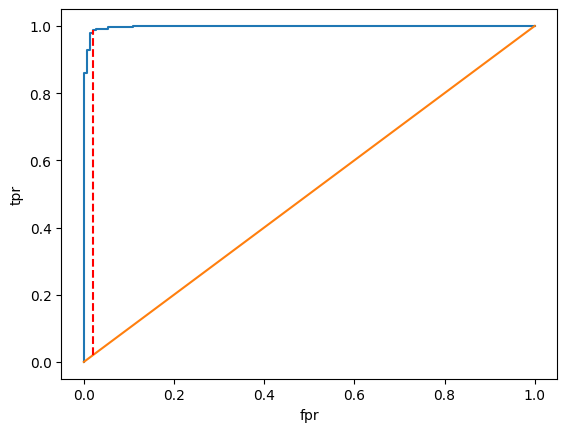

In [33]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color='red', linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

예측값에서의 Best Threshold 위치 그려보기

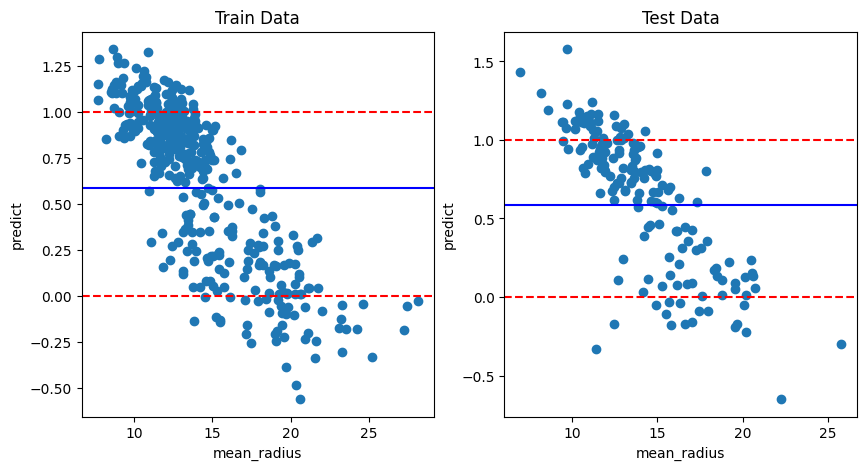

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred)
]

for idx, (name, d, pred) in enumerate(preds):
  ax = axes[idx]
  ax.scatter(x=d[:, 0], y=pred)
  ax.axhline(0, color="red", linestyle="--")
  ax.axhline(1, color="red", linestyle="--")
  ax.set_xlabel("mean_radius")
  ax.set_ylabel("predict")
  ax.set_title(f"{name} Data")
  ax.axhline(best_thresh, color="blue")

Threshold로 예측값을 0, 1로 변환 후 정확도 확인  

In [35]:
train_pred_label = list(map(int, (train_pred > best_thresh)))
test_pred_label = list(map(int, (test_pred > best_thresh)))

In [36]:
from sklearn.metrics import accuracy_score

linear_train_accuracy = accuracy_score(train_target, train_pred_label)
linear_test_accuracy = accuracy_score(test_target, test_pred_label)

In [37]:
print(f"Train accuracy is: {linear_train_accuracy:.2f}")
print(f"Test accuracy is: {linear_test_accuracy:.2f}")

Train accuracy is: 0.98
Test accuracy is: 0.96


## Logistic Regression

이번에는 Logistic Regression을 이용해 예측을 진행

### 3.1 Scaling
Logistic Regression을 학습하기에 앞서 학습시킬 데이터를 정규화해야함  
Logistic Regression에는 exp(exponential)가 있는데 exp는 값이 클 경우 overflow가 일어날 수 있기 때문

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

정규화는 항상 train_data를 이용해 학습하고 valid, test 데이터를 변환해야 함  
모든 데이터를 한 번에 학습할 경우 본 적 없는 valid data의 평균과 분산이 반영되고 이는 overfitting을 일으키는 원인이 됨  

In [40]:
scaler.fit(train_data)

StandardScaler()

학습된 scaler로 train/test 데이터를 변환

In [41]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [42]:
train_data[0]

array([1.130e+01, 1.819e+01, 7.393e+01, 3.894e+02, 9.592e-02, 1.325e-01,
       1.548e-01, 2.854e-02, 2.054e-01, 7.669e-02, 2.428e-01, 1.642e+00,
       2.369e+00, 1.639e+01, 6.663e-03, 5.914e-02, 8.880e-02, 1.314e-02,
       1.995e-02, 8.675e-03, 1.258e+01, 2.796e+01, 8.716e+01, 4.729e+02,
       1.347e-01, 4.848e-01, 7.436e-01, 1.218e-01, 3.308e-01, 1.297e-01])

In [43]:
scaled_train_data[0]

array([-0.77241528, -0.25350148, -0.71766034, -0.72713135, -0.05609214,
        0.52832818,  0.80418063, -0.54281688,  0.8826752 ,  1.92363784,
       -0.56190665,  0.82998234, -0.22721273, -0.4934605 , -0.1485608 ,
        1.83202549,  1.75089411,  0.22238033, -0.03320069,  1.67142344,
       -0.74402208,  0.36363441, -0.58496884, -0.70201562,  0.06028267,
        1.48259627,  2.23558836,  0.09272995,  0.71316397,  2.55107451])

### 3.2 학습
표준화된 데이터르 Logistic Regression 학습하기

In [44]:
from sklearn.linear_model import LogisticRegression

logit_regressor = LogisticRegression()

In [45]:
logit_regressor.fit(scaled_train_data, train_target)

LogisticRegression()

### 3.3 예측
Classification을 하는 모델의 경우 예측 방법은 두 가지가 있음  
1. predict
  - 해당 데이터가 어떤 class로 분류될 지 바로 알려줌
2. predict_proba
  - 각 class에 속할 확률을 보여줌

In [46]:
train_pred = logit_regressor.predict(scaled_train_data)
test_pred = logit_regressor.predict(scaled_test_data)

In [47]:
train_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [48]:
train_pred_logit = logit_regressor.predict_proba(scaled_train_data)
test_pred_logit = logit_regressor.predict_proba(scaled_test_data)

In [49]:
train_pred_logit[:10]

array([[9.77486880e-03, 9.90225131e-01],
       [9.99999999e-01, 1.10444571e-09],
       [2.00315051e-02, 9.79968495e-01],
       [1.74273407e-06, 9.99998257e-01],
       [4.94023919e-04, 9.99505976e-01],
       [9.99999933e-01, 6.70359495e-08],
       [2.92533805e-04, 9.99707466e-01],
       [8.26176477e-01, 1.73823523e-01],
       [1.33303137e-04, 9.99866697e-01],
       [5.72177528e-05, 9.99942782e-01]])

각 class에 속할 확률은 위와 같음  
현재 데이터의 경우 양성과 음성 2 개의 클래스가 있기 때문에 2개의 확률이 나타남  
만약 첫 번째 class에 속할 확률이 크다면 데이터는 0번 클래스에 속하게 됨  

In [50]:
train_pred_logit[0]

array([0.00977487, 0.99022513])

### 3.4 평가
데이터의 AUROC를 계산하기 위해서는 1의 클래스로 분류될 확률 하나만 필요  
반면 우리가 갖고있는 예측값은 0과 1로 분류될 확률을 모두 표시하고 있으므로 1에 속할 확률만 남기기  

In [51]:
train_pred_logit = train_pred_logit[:, 1]
test_pred_logit = test_pred_logit[:, 1]

In [52]:
train_pred_logit[0]

0.9902251312004187

In [54]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(train_target, train_pred_logit)
auroc = auc(fpr, tpr)

Text(0, 0.5, 'tpr')

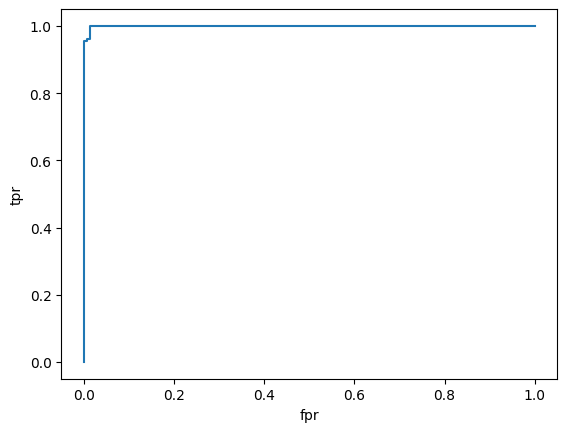

In [57]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [59]:
print(f"AUROC: {auroc:.4f}")

AUROC: 0.9994


In [60]:
J = tpr - fpr
idx = np.argmax(J)
best_thresh = threshold[idx]

print(f"Best Threshold is {best_thresh: .4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]: .4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]: .4f}")
print(f"Best Threshold's J is {J[idx]: .4f}")

Best Threshold is  0.4433
Best Threshold's sensitivity is  1.0000
Best Threshold's specificity is  0.9865
Best Threshold's J is  0.9865


Text(0, 0.5, 'tpr')

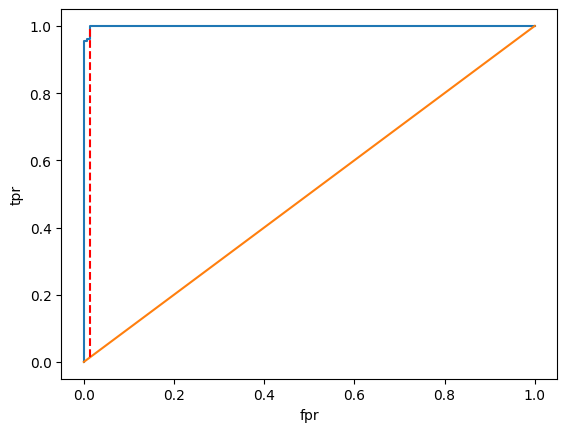

In [61]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color='red', linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

Text(0, 0.5, 'Probability')

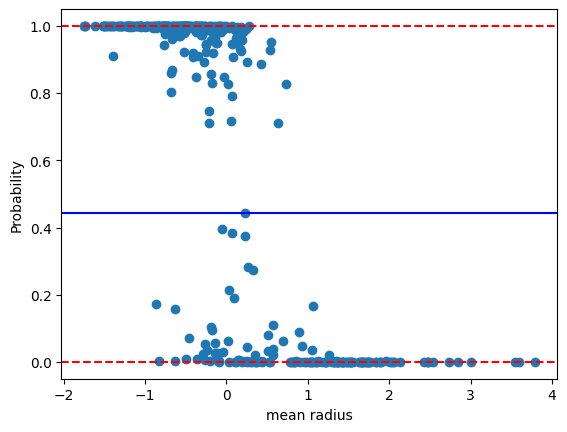

In [64]:
plt.scatter(x=scaled_train_data[:, 0], y=train_pred_logit)
plt.axhline(best_thresh, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.axhline(1, color="red", linestyle="--")
plt.xlabel("mean radius")
plt.ylabel("Probability")

Threshold로 예측값을 0, 1로 변환한 후 정확도 확인해보기

In [65]:
train_pred_label = list(map(int, (train_pred_logit > best_thresh)))
test_pred_label = list(map(int, (test_pred_logit > best_thresh)))

In [66]:
proba_train_accuracy = accuracy_score(train_target, train_pred_label)
proba_test_accuracy = accuracy_score(test_target, test_pred_label)

In [69]:
print(f"Train accuracy is {proba_train_accuracy:.2f}")
print(f"Test accuracy is {proba_test_accuracy:.2f}")

Train accuracy is 0.99
Test accuracy is 0.96


Predict 결과값으로 정확도를 확인해보기  

In [68]:
train_accuracy = accuracy_score(train_target, train_pred)
test_accuracy = accuracy_score(test_target, test_pred)

In [70]:
print(f"Train accuracy is {train_accuracy:.2f}")
print(f"Test accuracy is {test_accuracy:.2f}")

Train accuracy is 0.99
Test accuracy is 0.97


predict_proba의 best_threshold로 계산한 결과와 predict로 계산한 결과가 다름  
이는 두 0과 1로 예측하는 방법이 다르기 때문  

예를 들어 (0.49, 0.51)의 확률이 있을 때 predict의 경우 class 1에 속할 확률이 크기 때문에 1로 분류  
하지만 best_threshold가 0.52라면 predict_proba의 경우 class를 0으로 분류하게 됨  

## 4. 마무리
세 개의 모델들의 정확도 비교해보기

In [72]:
print(f"Linear Regression Test Accuracy: {linear_test_accuracy:.2f}")
print(f"Logistic Regression predict_proba Test Accuracy: {proba_test_accuracy:.2f}")
print(f"Logistic Regression predict Test Accuracy: {test_accuracy:.2f}")

Linear Regression Test Accuracy: 0.96
Logistic Regression predict_proba Test Accuracy: 0.96
Logistic Regression predict Test Accuracy: 0.97
